<a href="https://colab.research.google.com/github/SidElias/Image-Restoration/blob/main/IMAGE_RESTORATION_AND_ENHANCEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow
from skimage import morphology
from google.colab import files
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral
import pandas as pd
import matplotlib.image as mpimg

#Image Retoration

<ipython-input-3-dc9498af6ec8>:88: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


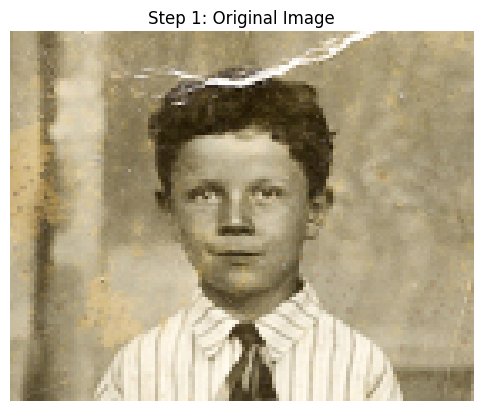

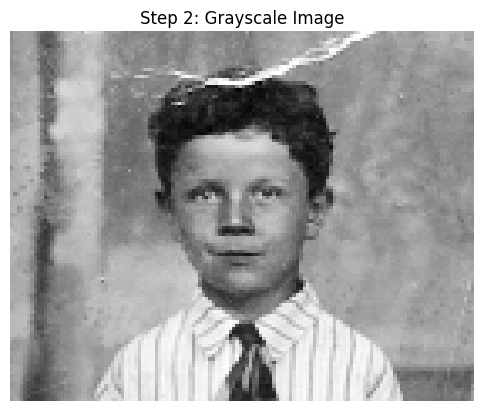

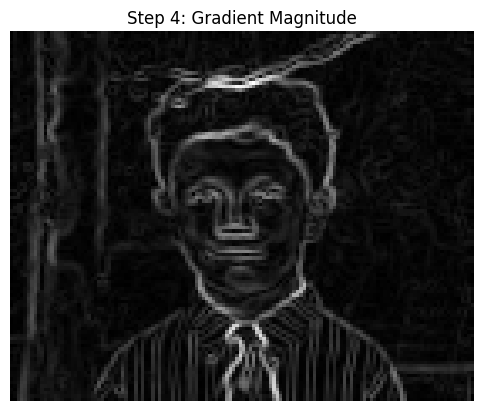

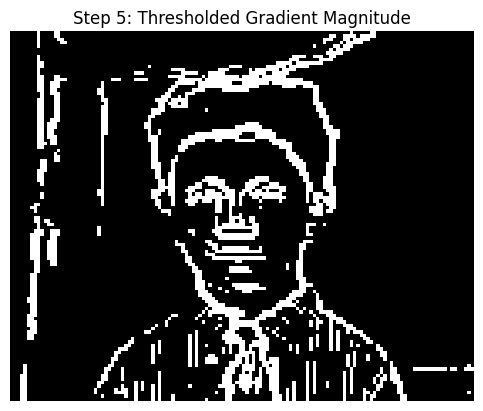

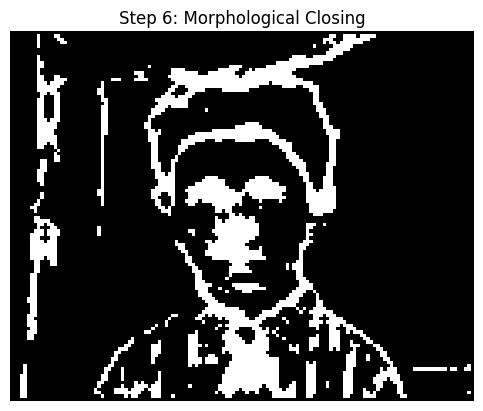

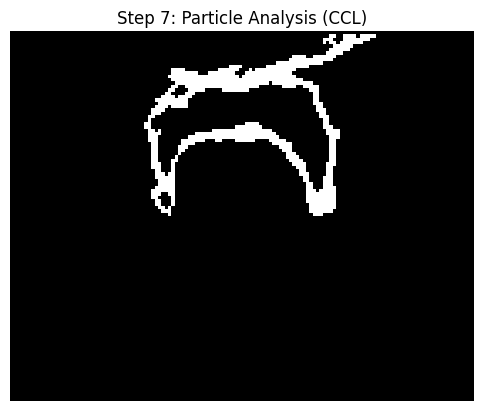

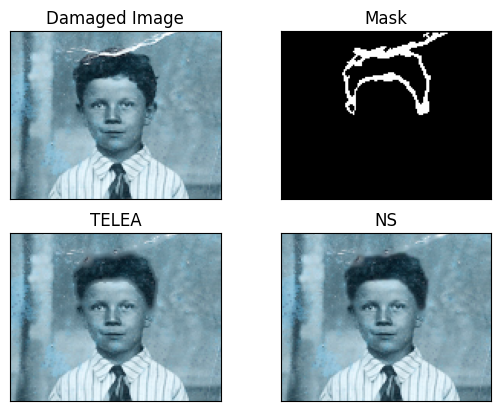

True

In [ ]:
import cv2
import numpy as np
from skimage import io, color, morphology
from scipy import ndimage
import matplotlib.pyplot as plt

# 1. Read Both the Images and downsample them(for fast calculation) by factor of 2.
args = {
		"image": "/content/Test Image.png"
}

# Load the image
im1 = cv2.resize(io.imread(args["image"]), None, fx=0.5, fy=0.5)
im1 = im1[:, :, :3] # Remove alpha channel if present

plt.figure()
plt.imshow(im1)
plt.title('Step 1: Original Image')
plt.axis('off')

# 2. Convert them into gray scale.
gray = color.rgb2gray(im1)

plt.figure()
plt.imshow(gray, cmap='gray')
plt.title('Step 2: Grayscale Image')
plt.axis('off')

# 4. Findout Gradient Magnitude of the Images using Sobel mask.
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
gx = cv2.filter2D(gray, -1, sobel_x)
gy = cv2.filter2D(gray, -1, sobel_y)
mg = np.hypot(gx, gy)

plt.figure()
plt.imshow(mg, cmap='gray')
plt.title('Step 4: Gradient Magnitude')
plt.axis('off')

# 5. Threshold Gradient magnitude with a threshold of 30 percentile of max value.
mgBw = mg > 0.17 * np.max(mg)

plt.figure()
plt.imshow(mgBw, cmap='gray')
plt.title('Step 5: Thresholded Gradient Magnitude')
plt.axis('off')

# 6. Apply morpholgical operation Closing of binary image by a disk mask of 3 X 3.
mgBw = ndimage.binary_closing(mgBw, morphology.disk(1))

plt.figure()
plt.imshow(mgBw, cmap='gray')
plt.title('Step 6: Morphological Closing')
plt.axis('off')

# 7. Apply Particle Analyze(CCL).
CCL = morphology.remove_small_objects(mgBw, min_size=500)

plt.figure()
plt.imshow(CCL, cmap='gray')
plt.title('Step 7: Particle Analysis (CCL)')
plt.axis('off')

# Use CCL as mask for inpainting
mask = CCL

# Resize mask to match original image size using zero padding
mask_resized = np.zeros_like(im1)
mask_resized[:mask.shape[0], :mask.shape[1]] = mask[:,:,np.newaxis]

img = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Step 8: Resized')
plt.axis('off')

#9 Perform inpainting using both techniques (TELEA and NS)
output1 = cv2.inpaint(img, mask_resized[:,:,0], 5, cv2.INPAINT_TELEA)
output2 = cv2.inpaint(img, mask_resized[:,:,0], 5, cv2.INPAINT_NS)

output = [img, mask_resized[:,:,0], output1, output2]
titles = ['Damaged Image', 'Mask', 'TELEA', 'NS']

# Display the results
for i in range(4):
    plt.subplot(2, 2, i+1)
    if i == 1:
        plt.imshow(output[i], cmap='gray')
    else:
        plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Save the Results
cv2.imwrite("TELEA.jpg", output1)
cv2.imwrite("NS.jpg", output2)

#Image Enhancement

##Denoising

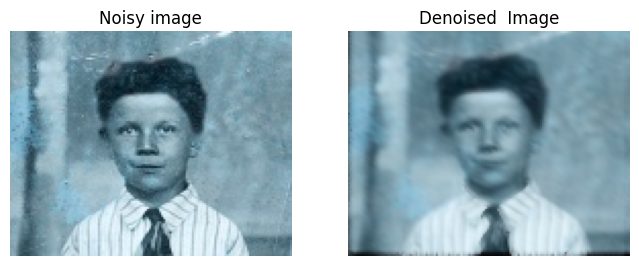

In [ ]:
# Read the image
image = cv2.imread("NS.jpg")

#Apply bilateral filter denoising
denoised_image = denoise_bilateral(image, channel_axis=-1)

# Save the denoised images
cv2.imwrite('/content/denoised_imageBI.jpg', denoised_image * 255)

# Show the noisy and denoised images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('Noisy image')

ax[1].imshow(denoised_image)
ax[1].axis('off')
ax[1].set_title('Denoised  Image')


plt.show()

##Contrast Enhancement using CLAHE

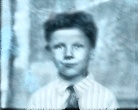

True

In [ ]:

# Load the image
img = cv2.imread('denoised_imageBI.jpg')

# Convert the image to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split the LAB image into separate channels
l, a, b = cv2.split(lab)

# Apply CLAHE to the L channel
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
l = clahe.apply(l)

# Merge the LAB channels back together
lab = cv2.merge((l,a,b))

# Convert the LAB image back to RGB color space
output = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)


# Display the result
cv2_imshow(output)

# Save the colour corrected images
cv2.imwrite('Colourcorrected.jpg', output)


##Brightening

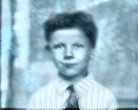

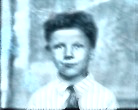

In [ ]:
from PIL import Image
from PIL import ImageEnhance

# Opens the image file
image = Image.open('Colourcorrected.jpg')

# shows image in image viewer
image.show()

# Enhance Brightness
curr_bri = ImageEnhance.Brightness(image)
new_bri = 1.1

# Brightness enhanced by a factor of 1.1
img_brightened = curr_bri.enhance(new_bri)

# shows updated image in image viewer
img_brightened.show()

# Save the brightened image
img_brightened.save('brightened_image.jpg')


##Sharpening

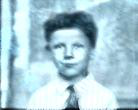

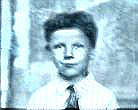

In [ ]:
from PIL import Image
from PIL import ImageEnhance

# Opens the image file
image = Image.open('brightened_image.jpg')

# shows image in image viewer
image.show()

# Enhance Sharpness
curr_sharp = ImageEnhance.Sharpness(image)
new_sharp = 4

# Sharpness enhanced by a factor of 8.3
img_sharped = curr_sharp.enhance(new_sharp)

# shows updated image in image viewer
img_sharped.show()

# Save the Sharpened image
img_sharped.save('Sharpened_image.jpg')